In [5]:
import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline #digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV #digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.datasets import fetch_openml

# fetch dataset
mushroom = fetch_openml(name='mushroom', version=1)

# data (as pandas dataframes)
X = mushroom.data
y = mushroom.target

# metadata
print(mushroom.details)

# variable information
print(mushroom.feature_names)

pd.set_option("display.max_columns", None)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'id': '24', 'name': 'mushroom', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': 'Jeff Schlimmer', 'collection_date': '1987-04-27', 'upload_date': '2014-04-06T23:21:11', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/24/mushroom.arff', 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0024/dataset_24.pq', 'file_id': '24', 'default_target_attribute': 'class', 'version_label': '1', 'citation': 'The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf', 'tag': ['Life Science', 'Machine Learning', 'mythbusting_1', 'OpenML100', 'study_1', 'study_123', 'study_14', 'study_144', 'study_15', 'study_190', 'study_20', 'study_34', 'study_37', 'study_41', 'study_50', 'study_70', 'trivial', 'uci'], 'visibility': 'public', 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/mushroom', 'paper_url': 'https://escholarship.org/uc/item/48r6d4z0', 'minio_url': '

In [ ]:
dataset =pd.read_csv('/content/drive/My Drive/Colab Notebooks/0_uts/agaricus-lepiota.data', sep=',', header=None)

In [13]:
print("Baris pertama dari X:")
print(X.head())

print("Baris pertama dari y:")
print(y.head())

Baris pertama dari X:
  cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s        

In [12]:
print("Baris terakhir dari X:")
print(X.tail())

print("Baris terakhir dari y:")
print(y.tail())

Baris terakhir dari X:
     cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
8119         k           s         n          f    n               a   
8120         x           s         n          f    n               a   
8121         f           s         n          f    n               a   
8122         k           y         n          f    y               f   
8123         x           s         n          f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
8119            c         b          y           e        NaN   
8120            c         b          y           e        NaN   
8121            c         b          n           e        NaN   
8122            c         n          b           t        NaN   
8123            c         b          y           e        NaN   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
8119                        s                        s                  

## masukkan nama kolom ke dataset (jika ada)

In [14]:
X.columns = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root",
             "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
             "spore-print-color", "population", "habitat"]

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

## cek data kosong

In [17]:
X.replace("?", np.nan, inplace= True)

<ipython-input-17-acd7abdf2cb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", np.nan, inplace= True)


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [20]:
X.loc[:,list(X.loc[:,X.isnull().any()].columns)].isnull().sum()/(len(X))*100

stalk-root    30.526834
dtype: float64

## cek data duplikat

In [21]:
X = X.drop_duplicates()

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

## cek data konstan

In [23]:
X = X.loc[:,X.apply(pd.Series.nunique) != 1]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

## visualisasi

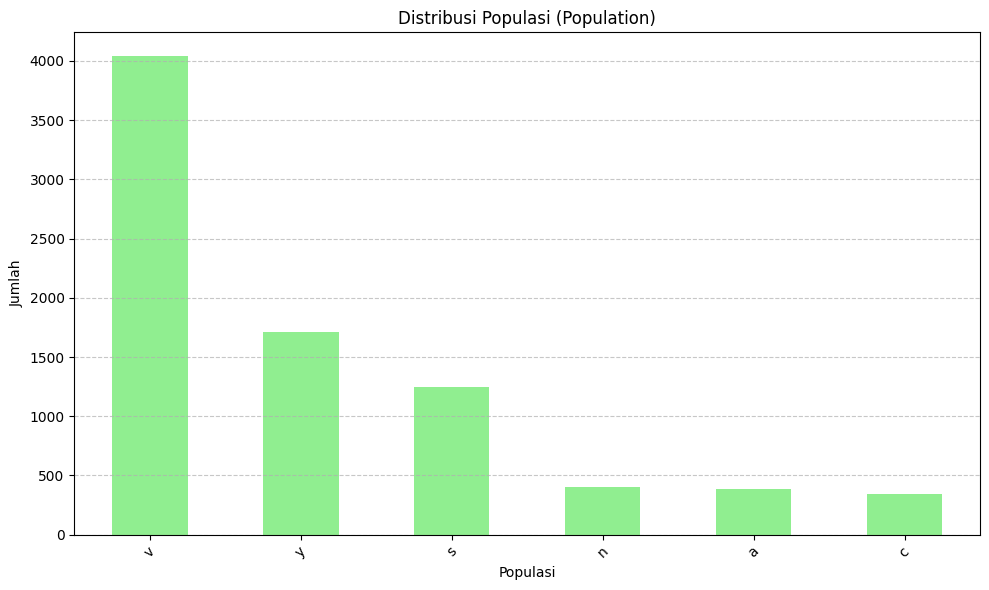

In [27]:
population_counts = X['population'].value_counts()

# Membuat diagram batang untuk distribusi 'population'
plt.figure(figsize=(10, 6))
population_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Populasi (Population)')
plt.xlabel('Populasi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

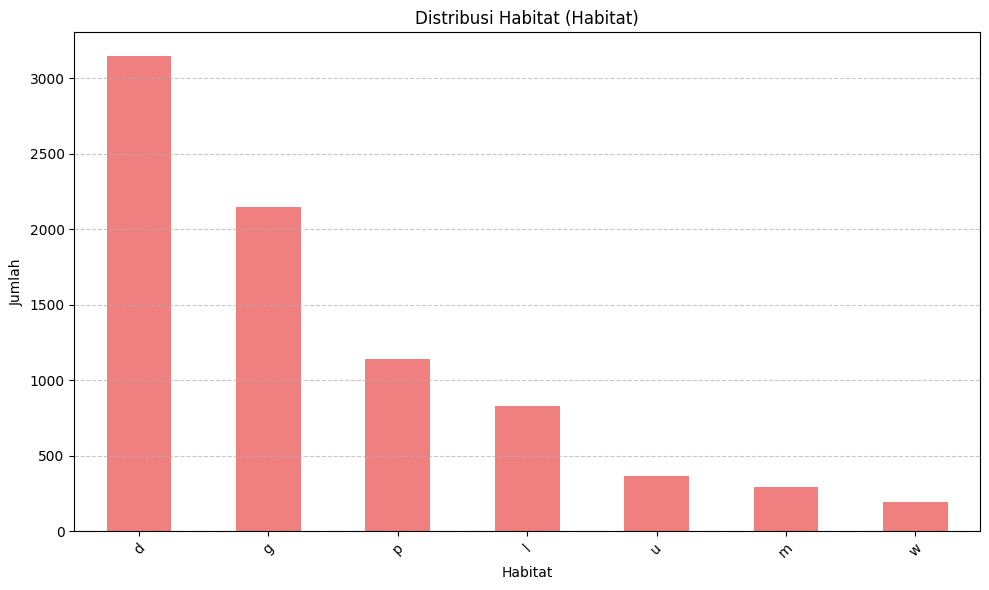

In [28]:
# Mengambil fitur 'habitat' untuk visualisasi
habitat_counts = X['habitat'].value_counts()

# Membuat diagram batang untuk distribusi 'habitat'
plt.figure(figsize=(10, 6))
habitat_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribusi Habitat (Habitat)')
plt.xlabel('Habitat')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## konversi nilai

In [30]:
categorical_col = []
for column in X.columns:
    if X[column].dtype == object and len(X[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {X[column].unique()}")
        print("====================================")

In [34]:
# Kolom cap-shape
cap_shape_mapping = {'x': 1, 'b': 2, 's': 3, 'f': 4, 'k': 5, 'c': 6}

# Kolom cap-surface
cap_surface_mapping = {'s': 1, 'y': 2, 'f': 3, 'g': 4}

# Kolom cap-color
cap_color_mapping = {'n': 1, 'y': 2, 'w': 3, 'g': 4, 'e': 5, 'p': 6, 'b': 7, 'u': 8, 'c': 9, 'r': 10}

# Kolom bruises
bruises_mapping = {'t': 1, 'f': 0}

# Kolom odor
odor_mapping = {'p': 1, 'a': 2, 'l': 3, 'n': 4, 'f': 5, 'c': 6, 'y': 7, 's': 8, 'm': 9}

# Kolom gill-attachment
gill_attachment_mapping = {'f': 1, 'a': 0}

# Kolom gill-spacing
gill_spacing_mapping = {'c': 1, 'w': 0}

# Kolom gill-size
gill_size_mapping = {'n': 1, 'b': 0}

# Kolom gill-color
gill_color_mapping = {'k': 1, 'n': 2, 'g': 3, 'p': 4, 'w': 5, 'h': 6, 'u': 7, 'e': 8, 'b': 9, 'r': 10, 'y': 11, 'o': 12}

# Kolom stalk-shape
stalk_shape_mapping = {'e': 1, 't': 0}

# Kolom stalk-root
stalk_root_mapping = {'e': 1, 'c': 2, 'b': 3, 'r': 4}

# Kolom stalk-surface-above-ring
stalk_surface_above_ring_mapping = {'s': 1, 'f': 2, 'k': 3, 'y': 4}

# Kolom stalk-surface-below-ring
stalk_surface_below_ring_mapping = {'s': 1, 'f': 2, 'y': 4, 'k': 3}

# Kolom stalk-color-above-ring
stalk_color_above_ring_mapping = {'w': 1, 'g': 2, 'p': 3, 'n': 4, 'b': 5, 'e': 6, 'o': 7, 'c': 8, 'y': 9}

# Kolom stalk-color-below-ring
stalk_color_below_ring_mapping = {'w': 1, 'g': 2, 'p': 3, 'n': 4, 'b': 5, 'e': 6, 'o': 7, 'c': 8, 'y': 9}

# Kolom veil-type (tidak perlu dimapping karena hanya memiliki satu nilai)

# Kolom veil-color
veil_color_mapping = {'w': 1, 'n': 2, 'o': 3, 'y': 4}

# Kolom ring-number
ring_number_mapping = {'o': 1, 't': 2, 'n': 3}

# Kolom ring-type
ring_type_mapping = {'p': 1, 'e': 2, 'l': 3, 'f': 4, 'n': 5}

# Kolom spore-print-color
spore_print_color_mapping = {'k': 1, 'n': 2, 'u': 3, 'h': 4, 'w': 5, 'r': 6, 'o': 7, 'y': 8, 'b': 9}

# Kolom population
population_mapping = {'s': 1, 'n': 2, 'a': 3, 'v': 4, 'y': 5, 'c': 6}

# Kolom habitat
habitat_mapping = {'u': 1, 'g': 2, 'm': 3, 'd': 4, 'p': 5, 'w': 6, 'l': 7}


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises                   8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego